## Importação dos dados

In [3]:
import pandas as pd

data = pd.read_csv("clustering_data.csv", sep = ";")

FileNotFoundError: ignored

### Análise Exploraória


In [2]:
print ("Total de daddos: ", len(data))
missing_data = data.isna().any()
print (missing_data)

NameError: ignored

### Removendo dados missing


In [ ]:
data = data.dropna()
print ("Total de daddos: ", len(data))

Total de daddos:  1703


In [ ]:
data.head()

,f1,f2
0,0.018637,8.964998
1,-5.737664,-1.860687
2,-4.195087,-4.641740
3,8.021220,-4.016667
4,-1.403076,5.093363


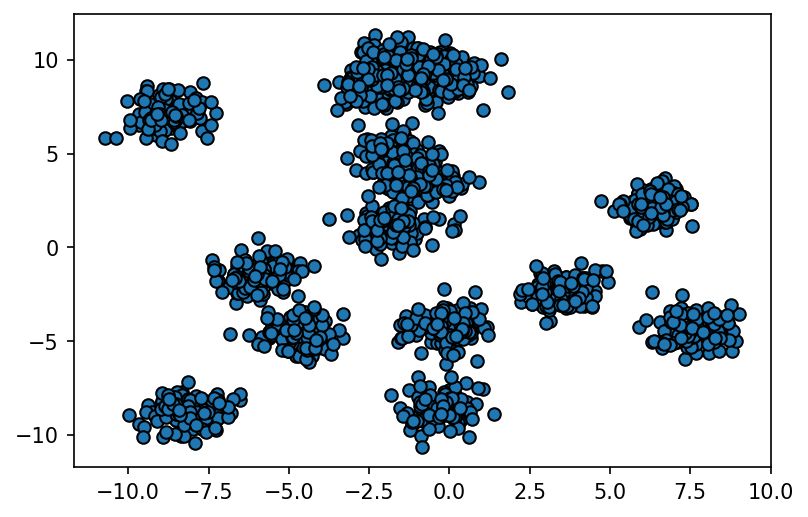

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150
plt.scatter(data["f1"], data["f2"], marker="o", edgecolor="black")
plt.show()

## Arrumando os dados


In [ ]:
import numpy as np

dados_temp =  []
for row in data.itertuples():
  aux = [row.f1, row.f2]
  dados_temp.append(aux)

data = np.array(dados_temp)

AttributeError: ignored

### Elbow Method
Para descobrir a quantidade de clusters

In [ ]:
from sklearn.cluster import KMeans

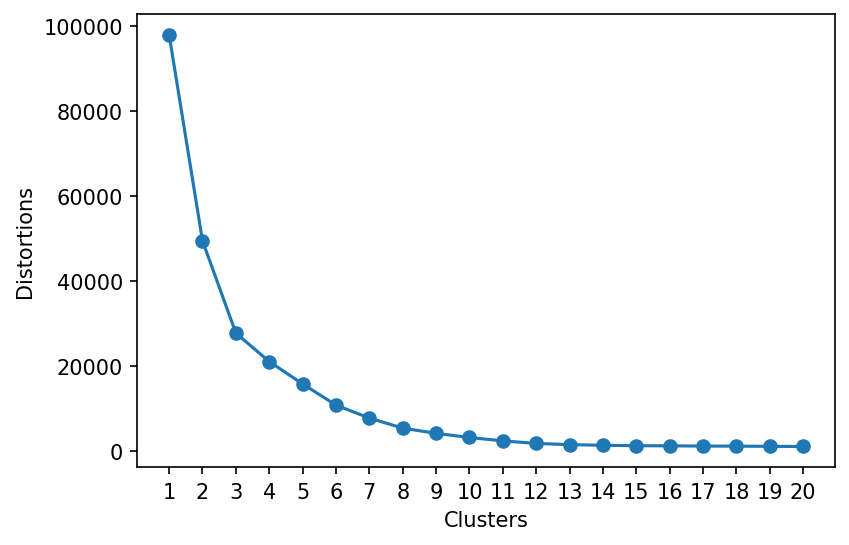

In [ ]:
distortions = []

for qtd in range(1, 21):
    modelo = KMeans(n_clusters=qtd)
    modelo.fit(data)

    metrica = modelo.inertia_
    distortions.append(modelo.inertia_)

plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel("Clusters")
plt.ylabel("Distortions")
plt.xticks(range(1, 21))
plt.show()


Baseado no grafico escolhemos 13 como a quantidade de grupos


Criando o modelo com 13 grupos


In [ ]:
modelo = KMeans(n_clusters=13)
modelo.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=13, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Predição

In [ ]:
resposta = modelo.predict(data)

### Vizualização

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

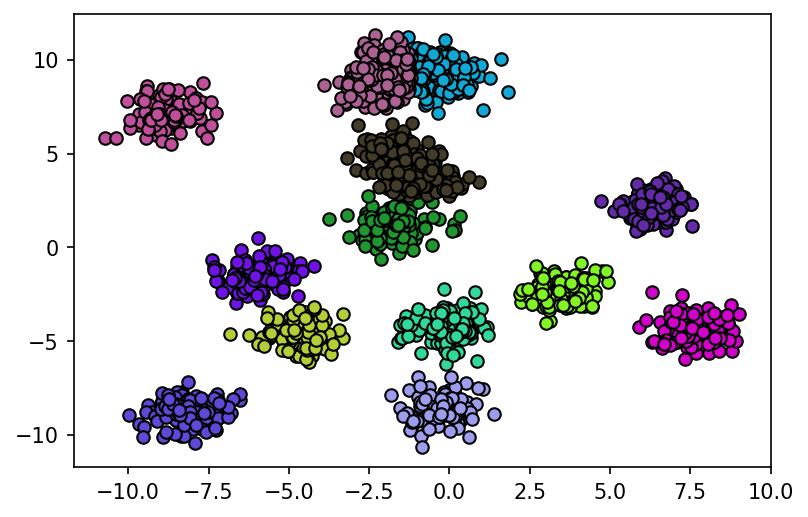

In [ ]:
for i in range(13):
  grupo_i = data[resposta == i]
  plt.scatter(grupo_i[:,0], grupo_i[:,1], c=np.random.rand(3), edgecolor="black")

### Metricas de Avaliação

In [ ]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score
sh = silhouette_score(data, modelo.labels_)
ch = calinski_harabasz_score(data,modelo.labels_)

In [ ]:
print ("SH", sh)
print ("CH", ch)

SH 0.6345099296468563
CH 8736.746790590445
